In [5]:
# hide_input

from IPython.core.display import display, HTML, Javascript
from IPython.display import display, Javascript

display(Javascript('''
    var cell = Jupyter.notebook.get_selected_cell();
    cell.element.hide();
'''))

# ----- Notebook Theme -----
color_map = ['#f4a261', '#e8f6f3', '#d0ece7', '#a2d9ce', '#73c6b6', '#45b39d', 
                        '#16a085', '#138d75', '#117a65', '#0e6655', '#e76f51']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = ''' 

div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s; /* light orange */
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s; /* light orange */
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
    border-top: 2px solid %s; /* light orange */
}

div.input_prompt {
color: %s; /* light blue */
}

div.output_prompt {
color: %s; /* strong orange */
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s; /* light orange */
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s; /* light orange */
}

.edit_mode div.cell.selected:before {
background: %s; /* light orange */
}

.edit_mode div.cell.selected {
border-color: %s; /* light orange */

}
'''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

C:\Users\redpo\AppData\Local\Temp\ipykernel_12884\1429800422.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Javascript


<IPython.core.display.Javascript object>

# 🔥 EDA 🔥 VKLAB 🔥 
## 🔥 RecSys Case Study 🔥


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## 1.1. Read data and Quick view

- view — количество просмотров
- like — количество лайков
- comment — количество комментариев
- hide — количество скрытий
- expand — количество расширений (вероятно, разворачивание поста)
- open_photo — открытие фотографии
- open — общее открытие поста
- share_to_message — количество делений поста через сообщение
- text — текст поста
- photo — ссылка на фото

In [10]:
data = pd.read_csv("../data/dataset.csv")
display(data.head())


,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo
0,10869,185,0,2,0,1947,14,20,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,9083,227,1,7,4,958,23,2,• &#128571;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,5352,25,5,12,598,430,114,4,"Новость, конечно, старенькая, но все равно инт...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,4260,539,5,3,1,138,62,24,Фантазийные бриллианты.,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,5676,112,2,4,371,271,499,4,Сегодня на стадионе «Динамо» прошли соревнован...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


## 1.2. Basic statistics

* Примечательно, что данные распределены с большими различиями по диапазону значений: например, минимальные значения по ряду метрик равны нулю, в то время как максимальные довольно высокие (например, 7 млн просмотров или 67834 лайка). Это говорит о сильной вариативности популярности постов.
* Средние значения показывают, что медианный пост получает около 7333 просмотров и 96 лайков, что можно использовать для сравнения с новыми данными или для определения аномалий.
* Стандартное отклонение очень велико для всех метрик, что говорит о разбросе данных.

In [11]:
display(data.describe())

,view,like,comment,hide,expand,open_photo,open,share_to_message
count,2.352700e+04,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000,2.352700e+04,23527.000000
mean,2.017510e+04,382.532580,10.259064,10.739576,780.819697,888.538275,5.957260e+02,55.747907
std,7.954857e+04,1447.320109,70.074167,47.420019,10652.744305,6065.675125,9.374567e+03,288.719215
min,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3.709000e+03,27.000000,0.000000,0.000000,0.000000,49.000000,1.400000e+01,2.000000
50%,7.333000e+03,96.000000,2.000000,2.000000,7.000000,153.000000,5.600000e+01,8.000000
75%,1.659850e+04,305.000000,7.000000,7.000000,224.500000,488.000000,2.360000e+02,31.000000
max,7.010336e+06,67834.000000,5561.000000,2899.000000,987856.000000,440489.000000,1.163508e+06,13328.000000


## 1.3. Data types

In [12]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23527 entries, 0 to 23526
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   view              23527 non-null  int64 
 1   like              23527 non-null  int64 
 2   comment           23527 non-null  int64 
 3   hide              23527 non-null  int64 
 4   expand            23527 non-null  int64 
 5   open_photo        23527 non-null  int64 
 6   open              23527 non-null  int64 
 7   share_to_message  23527 non-null  int64 
 8   text              19322 non-null  object
 9   photo             23527 non-null  object
dtypes: int64(8), object(2)
memory usage: 1.8+ MB


None

## 1.4. Missing values

In [13]:
display(data.isnull().sum())

view                   0
like                   0
comment                0
hide                   0
expand                 0
open_photo             0
open                   0
share_to_message       0
text                4205
photo                  0
dtype: int64

## 2.1 Unique values

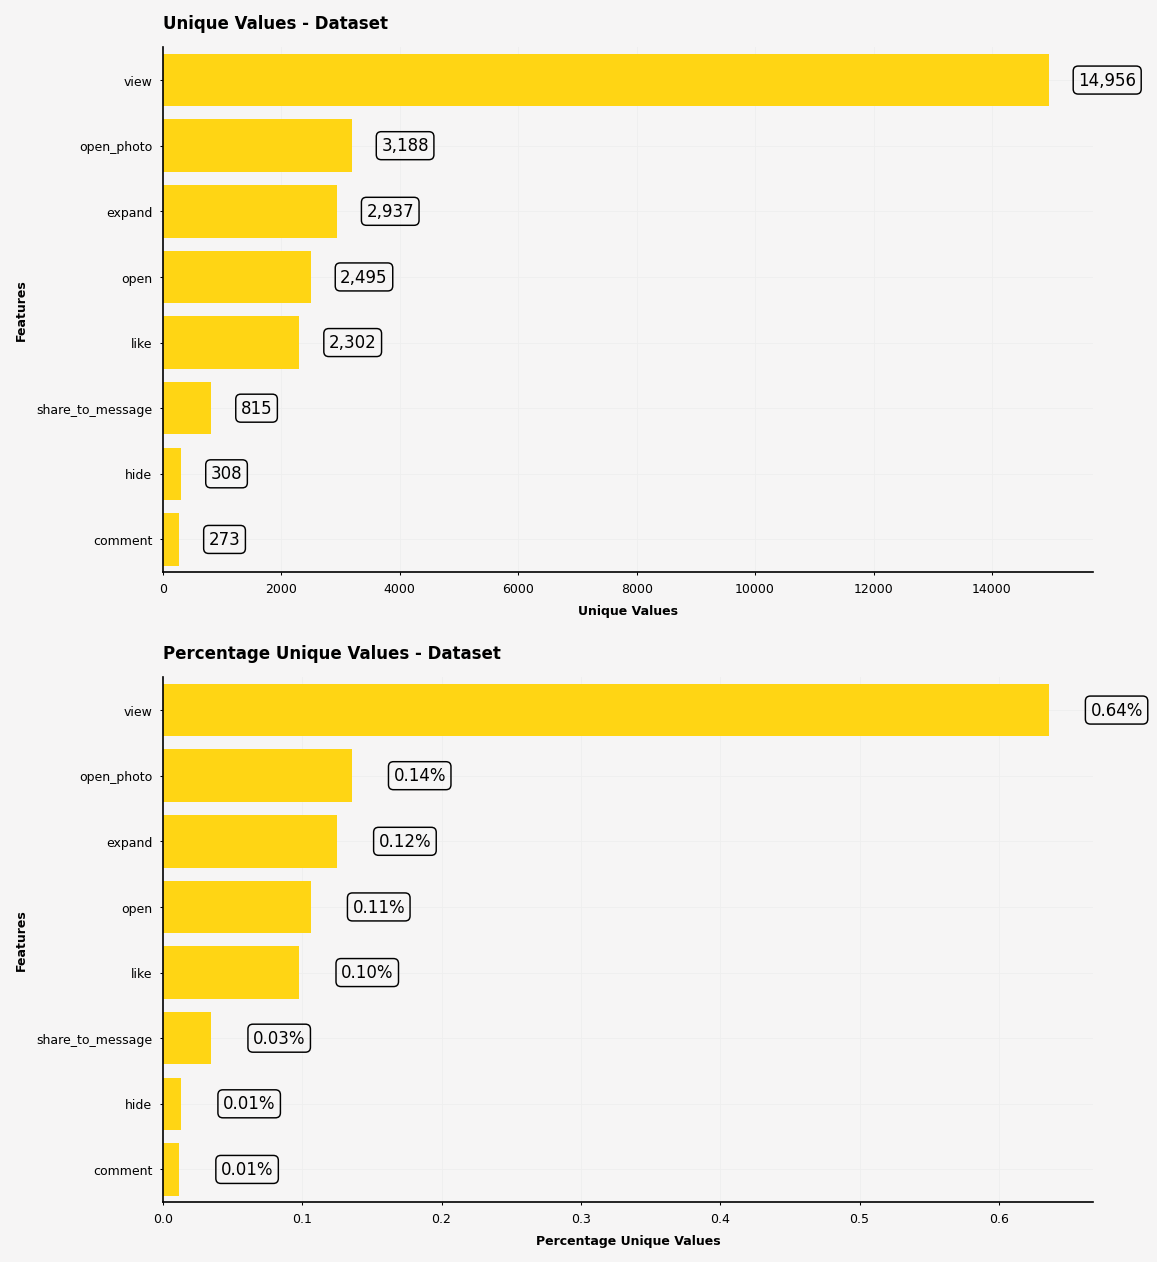

In [28]:
integer_features = [col for col in data.select_dtypes(include=['int64', 'float64']).columns]

# Рассчитываем количество уникальных значений в тренировочных данных
unique_values_train = pd.DataFrame(data[integer_features].nunique())
unique_values_train = unique_values_train.reset_index(drop=False)
unique_values_train.columns = ['Features', 'Count']
unique_values_train = unique_values_train.sort_values(by='Count', ascending=False)

# Рассчитываем процент уникальных значений относительно размера данных
unique_values_percent_train = pd.DataFrame(data[integer_features].nunique() / data.shape[0])
unique_values_percent_train = unique_values_percent_train.reset_index(drop=False)
unique_values_percent_train.columns = ['Features', 'Count']
unique_values_percent_train = unique_values_percent_train.sort_values(by='Count', ascending=False)

# Настройки для построения графиков
plt.rcParams['figure.dpi'] = 150
fig = plt.figure(figsize=(8, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.2)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*int(len(integer_features)))

# График уникальных значений
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_values_train['Features'], x=unique_values_train['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("Unique Values", fontsize=6, weight='bold')
ax0_sns.set_ylabel("Features", fontsize=6, weight='bold')
ax0_sns.tick_params(labelsize=6, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1, 'Unique Values - Dataset', fontsize=8, ha='left', va='top', weight='bold')

# Добавляем текст с метками
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 500
    y = p.get_y() + p.get_height() / 2
    ax0.text(x, y, value, ha='left', va='center', fontsize=8, 
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.7))

# График процента уникальных значений
ax1 = fig.add_subplot(gs[1, 0])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1_sns = sns.barplot(ax=ax1, y=unique_values_percent_train['Features'], x=unique_values_percent_train['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax1_sns.set_xlabel("Percentage Unique Values", fontsize=6, weight='bold')
ax1_sns.set_ylabel("Features", fontsize=6, weight='bold')
ax1_sns.tick_params(labelsize=6, width=0.5, length=1.5)
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.text(0, -1, 'Percentage Unique Values - Dataset', fontsize=8, ha='left', va='top', weight='bold')

# Добавляем текст с метками для процента уникальных значений
for p in ax1.patches:
    value = f'{p.get_width():.2f}'
    x = p.get_x() + p.get_width() + 0.03
    y = p.get_y() + p.get_height() / 2
    ax1.text(x, y, f"{value}%", ha='left', va='center', fontsize=8, 
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.7))

plt.show()


## 2.2. Correlation matrix

1. Высокая корреляция между признаками:
    * view и expand имеют корреляцию 0.78. Это указывает на то, что чем больше просмотров получает пост, тем чаще пользователи его разворачивают, что логично: если пост интересен, люди будут его разворачивать для дальнейшего прочтения.
    * view и hide также имеют довольно высокую корреляцию 0.64. Это может означать, что, несмотря на большое количество просмотров, посты также могут быть скрыты пользователями, возможно, из-за раздражающего или неподходящего контента.
    * expand и open коррелируют на 0.70, что также логично, поскольку развёрнутые посты приводят к более частому открытию их полного содержимого.

2. Средняя корреляция:
    * like и share_to_message имеют корреляцию 0.56. Это указывает на то, что посты, которые получают лайки, также часто делятся через сообщения.
    * like и view коррелируют на 0.58, что также ожидаемо: посты, которые получают много просмотров, скорее всего, будут иметь больше лайков.
    * open и expand — корреляция 0.70, указывает на то, что пользователи, которые разворачивают посты, скорее всего, будут открывать их полностью.

3. Низкая корреляция:
    * comment с остальными признаками имеет относительно низкую корреляцию, что может означать, что комментарии не так сильно зависят от остальных действий пользователей, как просмотры, лайки или разворачивание поста.

4. Возможные выводы и действия:
    * Высокая корреляция между такими признаками, как view, expand, и open, может указывать на то, что они могут нести схожую информацию. Это стоит учитывать при построении моделей — возможно, некоторые признаки можно исключить, чтобы избежать мультиколлинеарности.
    * Признак comment показывает слабую корреляцию с другими метриками, что может свидетельствовать о том, что он отражает другой аспект пользовательского взаимодействия с постом, не зависящий от количества просмотров или лайков.
    * Можно рассмотреть возможность создания новых признаков на основе этих корреляций, чтобы улучшить модели машинного обучения.

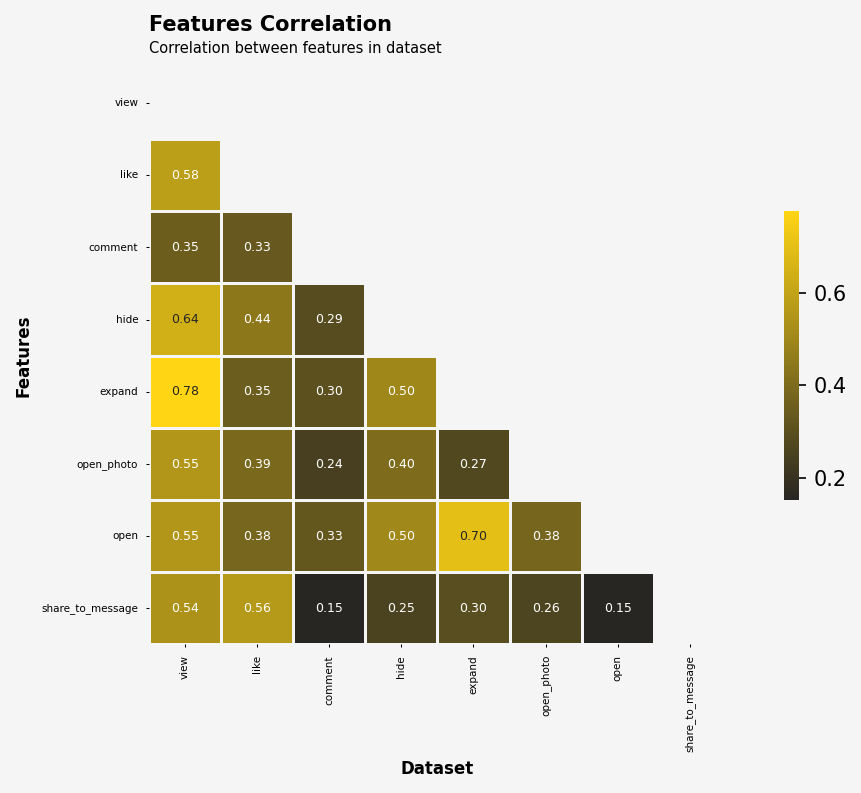

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Предположим, что данные уже загружены в 'data' (для тренировочных данных)

# Подготавливаем числовые фичи
integer_features = [col for col in data.select_dtypes(include=['int64', 'float64']).columns]

# Рассчитываем корреляции для тренировочных данных
train_corr = data[integer_features].corr()

plt.rcParams['figure.dpi'] = 150
fig = plt.figure(figsize=(10, 5), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)  # Сетка 1x1, так как у нас только тренировочные данные
gs.update(wspace=0.5, hspace=0)

background_color = "#f6f5f5"
cmap_train = sns.dark_palette('#ffd514', as_cmap=True)

# Маска для треугольной матрицы (чтобы скрыть верхний треугольник)
mask = np.triu(np.ones_like(train_corr, dtype=bool))

# Создаем ось для тепловой карты корреляций
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["top", "right"]:
    ax0.spines[s].set_visible(False)

# Рисуем тепловую карту корреляций
sns.heatmap(train_corr, ax=ax0, cmap=cmap_train, square=True, mask=mask, linewidths=.5, linecolor='#f6f5f5', 
            cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"fontsize": 6})

# Настройки осей и текста
ax0.tick_params(labelsize=5, width=0.5, length=1.5)
ax0.set_xlabel('Dataset', fontsize=8, fontweight='bold')
ax0.set_ylabel('Features', fontsize=8, fontweight='bold')

# Добавляем заголовок и описание
ax0.text(0, -0.5, 'Features Correlation', fontsize=10, fontweight='bold')
ax0.text(0, -0.2, 'Correlation between features in dataset', fontsize=7)

# Отображение графика
plt.show()


## 2.3. Histogram

Вот несколько комментариев по каждому признаку:

* Все признаки — Пики находятся около нуля, что свидетельствует о большом количестве записей с минимальными значениями, что характерно для таких событий, как просмотры, открытия фото или деление поста.
* Распределение "open", "open_photo", "view" — Видно длинный хвост справа, что указывает на наличие небольшой группы данных с аномально высокими значениями. Это говорит о редких случаях, когда посты получают огромное количество просмотров или взаимодействий.
* Очень малые значения на оси Y — Это означает, что плотность распределения по большинству данных низкая. Пик у нуля и быстрое падение на оси X также говорят о том, что большие значения признаков крайне редки.

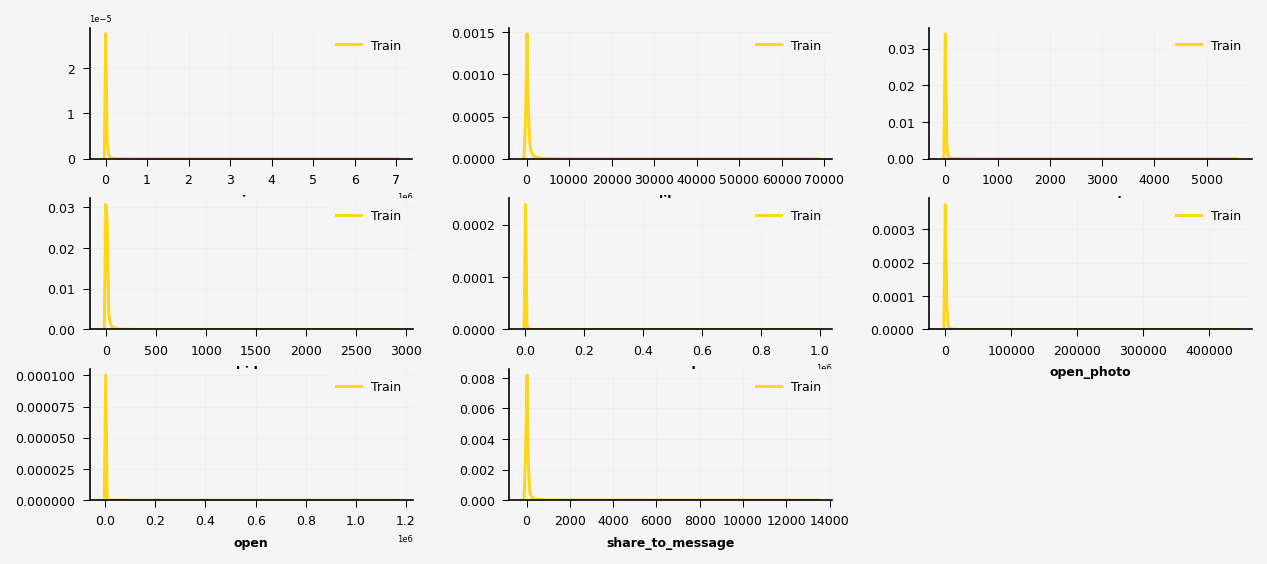

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что данные уже загружены в 'data' (для тренировочных данных)

# Устанавливаем DPI для лучшего качества графиков
plt.rcParams['figure.dpi'] = 150
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(7, 3)  # Создаем сетку 7x3
gs.update(wspace=0.3, hspace=0.3)  # Настройки промежутков между графиками

background_color = '#f6f5f5'
run_no = 0

# Устанавливаем цветовую палитру для графиков
colormap = ['#ffd514', '#ff8826', '#ff355d', '#C70039']

# Подготавливаем числовые фичи
integer_features = [col for col in data.select_dtypes(include=['int64', 'float64']).columns]

# Инициализация подграфиков
for row in range(0, 7):
    for col in range(0, 3):
        if run_no < len(integer_features):  # Проверяем, чтобы не выйти за пределы количества фич
            locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
            locals()["ax"+str(run_no)].set_facecolor(background_color)
            for s in ["top", "right"]:
                locals()["ax"+str(run_no)].spines[s].set_visible(False)
            run_no += 1  

# Сбрасываем счетчик и строим графики для тренировочных данных
run_no = 0
for col in integer_features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=data[col], zorder=2, alpha=1, linewidth=1.4, color=colormap[0], label='Train')    
    
    # Настройки сетки и подписей осей
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=6, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=6, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)

    # Настройка легенды
    locals()["ax"+str(run_no)].legend(fontsize=6, ncol=3, loc='upper right', facecolor=background_color, edgecolor=background_color)

    run_no += 1

# Отображение графиков
plt.show()


## 2.4. Log transformation Histogram

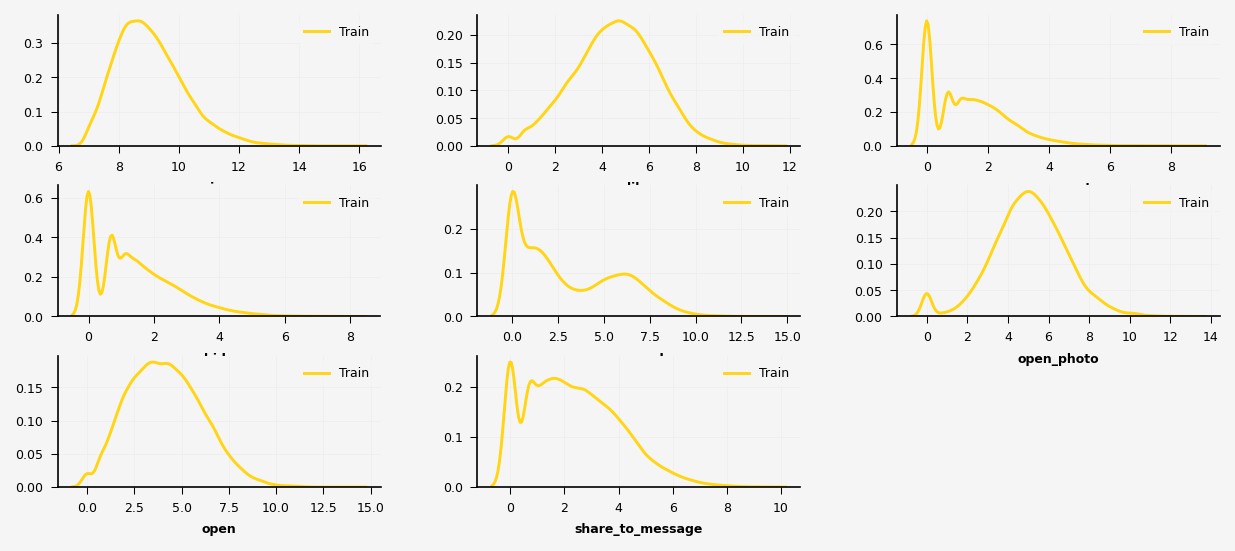

In [38]:
# Применим логарифмическое преобразование ко всем признакам, добавляя 1, чтобы избежать log(0)
data_log = data[integer_features].apply(lambda x: np.log1p(x))

# Визуализируем преобразованные данные
plt.rcParams['figure.dpi'] = 150
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(7, 3)  # Создаем сетку 7x3
gs.update(wspace=0.3, hspace=0.3)  # Настройки промежутков между графиками

background_color = '#f6f5f5'
run_no = 0

# Устанавливаем цветовую палитру для графиков
colormap = ['#ffd514', '#ff8826', '#ff355d', '#C70039']

# Подготавливаем числовые фичи
integer_features = [col for col in data_log.select_dtypes(include=['int64', 'float64']).columns]

# Инициализация подграфиков
for row in range(0, 7):
    for col in range(0, 3):
        if run_no < len(integer_features):  # Проверяем, чтобы не выйти за пределы количества фич
            locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
            locals()["ax"+str(run_no)].set_facecolor(background_color)
            for s in ["top", "right"]:
                locals()["ax"+str(run_no)].spines[s].set_visible(False)
            run_no += 1  

# Сбрасываем счетчик и строим графики для тренировочных данных
run_no = 0
for col in integer_features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=data_log[col], zorder=2, alpha=1, linewidth=1.4, color=colormap[0], label='Train')    
    
    # Настройки сетки и подписей осей
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=6, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=6, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)

    # Настройка легенды
    locals()["ax"+str(run_no)].legend(fontsize=6, ncol=3, loc='upper right', facecolor=background_color, edgecolor=background_color)

    run_no += 1

# Отображение графиков
plt.show()

## 2.5. Log transformation Correlation matrix

В матрице корреляций можно выделить следующие важные наблюдения:
* Высокая корреляция между view и like (0.60), а также view и hide (0.64). Это говорит о том, что посты с большим количеством просмотров не только получают много лайков, но и могут раздражать некоторых пользователей, что ведет к их скрытию.
* view также сильно коррелирует с open_photo (0.62) и share_to_message (0.64), что указывает на взаимосвязь между популярностью поста и действиями пользователей, такими как открытие фото или пересылка сообщений.

`Стоит обратить внимание на отрицательную корреляцию между like и expand (-0.10), что может свидетельствовать о том, что посты, которые получают много лайков, не всегда требуют разворачивания, или наоборот — разворачиваемые посты могут не получать много лайков.`

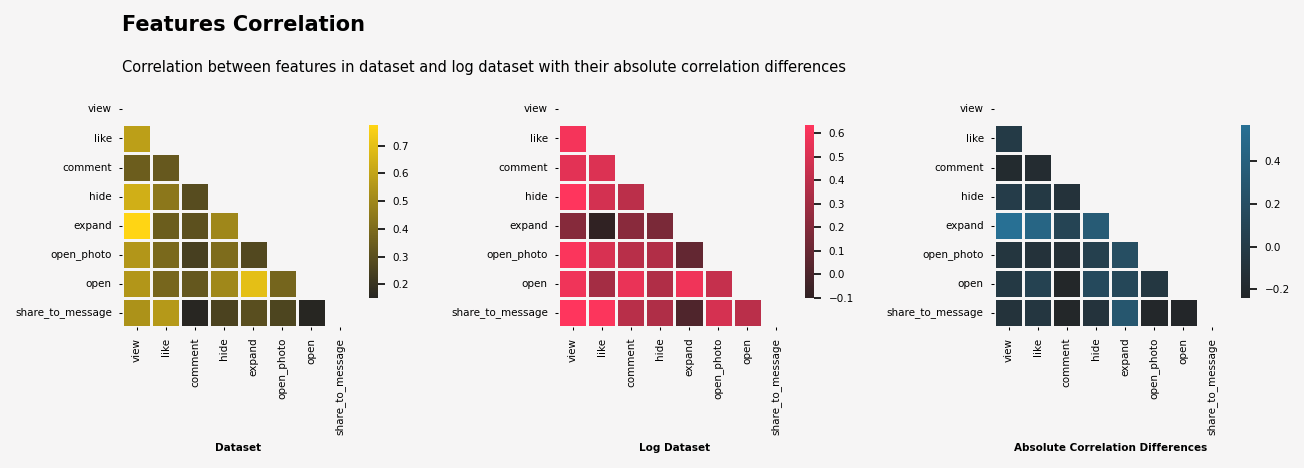

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Предположим, что данные уже загружены в 'data' (для тренировочных данных)

# Подготавливаем числовые фичи
integer_features = [col for col in data_log.select_dtypes(include=['int64', 'float64']).columns]

# Рассчитываем корреляции для тренировочных данных
train_corr = data[integer_features].corr()
test_corr = data_log[integer_features].corr()
diff_corr = train_corr - test_corr

plt.rcParams['figure.dpi'] = 150
fig = plt.figure(figsize=(10, 5), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 3)
gs.update(wspace=0.5, hspace=0)

background_color = "#f6f5f5"
cmap_train = sns.dark_palette('#ffd514', as_cmap=True)
cmap_test = sns.dark_palette('#ff355d', as_cmap=True)
cmap_diff = sns.dark_palette('#287094', as_cmap=True)

mask = np.triu(np.ones_like(train_corr, dtype=bool))

run_no = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1
        
sns.heatmap(train_corr, ax=ax0, cmap=cmap_train, square=True, mask=mask, linewidths=.5, linecolor='#f6f5f5', 
            cbar_kws={"shrink": .3})
ax0.set_xlabel(col, fontsize=5, fontweight='bold')
ax0.tick_params(labelsize=5, width=0.5, length=1.5)
ax0.set_xlabel('Dataset', fontsize=5, fontweight='bold')
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=5)

sns.heatmap(test_corr, ax=ax1, cmap=cmap_test, square=True, mask=mask, linewidths=.5, linecolor='#f6f5f5', 
            cbar_kws={"shrink": .3})
ax1.set_xlabel(col, fontsize=5, fontweight='bold')
ax1.tick_params(labelsize=5, width=0.5, length=1.5)
ax1.set_xlabel('Log Dataset', fontsize=5, fontweight='bold')
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=5)

sns.heatmap(diff_corr, ax=ax2, cmap=cmap_diff, square=True, mask=mask, linewidths=.5, linecolor='#f6f5f5', 
            cbar_kws={"shrink": .3})
ax2.set_xlabel(col, fontsize=5, fontweight='bold')
ax2.tick_params(labelsize=5, width=0.5, length=1.5)
ax2.set_xlabel('Absolute Correlation Differences', fontsize=5, fontweight='bold')
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=5)

ax0.text(0, -2.2, 'Features Correlation', fontsize=10, fontweight='bold')
ax0.text(0, -0.8, 'Correlation between features in dataset and log dataset with their absolute correlation differences', fontsize=7)

plt.show()

## 2.7. Outliers detection

Примечательно, что после логарифмического преобразования количество выбросов значительно сократилось:

Например, для признака view количество выбросов снизилось с 2506 до 369.
Признак expand показывает почти полное устранение выбросов после лог-преобразования (с 3809 до 2 выбросов).

Это подтверждает, что логарифмическое преобразование помогло смягчить влияние редких больших значений и сделать распределение более "нормальным".

In [53]:
# Функция для обнаружения выбросов с помощью межквартильного размаха (IQR)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for col in integer_features:
    outliers = detect_outliers(data, col)
    print(f"Количество выбросов в признаке '{col}': {len(outliers)}")


for col in integer_features:
    outliers = detect_outliers(data_log, col)
    print(f"Количество выбросов в log признаке '{col}': {len(outliers)}")


Количество выбросов в признаке 'view': 2506
Количество выбросов в признаке 'like': 2672
Количество выбросов в признаке 'comment': 2513
Количество выбросов в признаке 'hide': 2817
Количество выбросов в признаке 'expand': 3809
Количество выбросов в признаке 'open_photo': 2881
Количество выбросов в признаке 'open': 3222
Количество выбросов в признаке 'share_to_message': 3015
Количество выбросов в log признаке 'view': 369
Количество выбросов в log признаке 'like': 53
Количество выбросов в log признаке 'comment': 128
Количество выбросов в log признаке 'hide': 164
Количество выбросов в log признаке 'expand': 2
Количество выбросов в log признаке 'open_photo': 812
Количество выбросов в log признаке 'open': 99
Количество выбросов в log признаке 'share_to_message': 156
